In [1]:
%matplotlib inline
from nanovna import NanoVNA

In [65]:
#reload script
%run nanovna.py

In [12]:
#instanceを生成
nv = NanoVNA('/dev/cu.usbmodem401')

In [19]:
nv.resume()

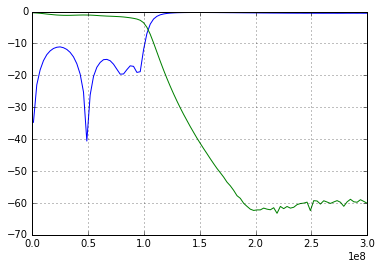

In [22]:
nv.logmag(nv.data(0))
nv.logmag(nv.data(1))
nv.resume()

In [15]:
a = nv.data(0)
b = nv.data(1)

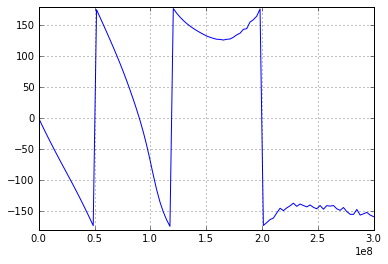

In [16]:
nv.phase(b)

In [17]:
a

array([ 0.01246035 -1.58797440e-02j, -0.00866127 -6.97079740e-02j,
       -0.04222728 -1.15677334e-01j, -0.09201751 -1.43823102e-01j,
       -0.14765747 -1.49449899e-01j, -0.20138575 -1.35523363e-01j,
       -0.24305312 -1.02494128e-01j, -0.27080530 -5.71944260e-02j,
       -0.27971882 -6.99584500e-03j, -0.26907292 +4.40693050e-02j,
       -0.24088305 +8.66062640e-02j, -0.19859442 +1.15753814e-01j,
       -0.14841373 +1.27066627e-01j, -0.09569300 +1.20097838e-01j,
       -0.05156963 +9.20905470e-02j, -0.02104931 +5.01451520e-02j,
       -0.00866800 +4.88108000e-04j, -0.01736783 -4.68257360e-02j,
       -0.04384594 -8.58118980e-02j, -0.07889305 -1.08475185e-01j,
       -0.11559161 -1.11082322e-01j, -0.14483015 -1.00106723e-01j,
       -0.16154118 -7.83933020e-02j, -0.16068070 -5.29539130e-02j,
       -0.14511135 -3.55947910e-02j, -0.12046393 -3.13718350e-02j,
       -0.09601796 -4.53632580e-02j, -0.07967011 -6.88652910e-02j,
       -0.07910766 -9.61398850e-02j, -0.08660254 -1.11095376e-

## scikit-rfでスミスチャート

1-Port Network: '',  1-300 MHz, 101 pts, z0=[ 50.+0.j]

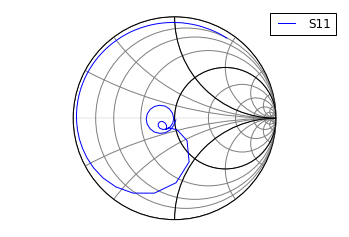

In [29]:
#scikit-rf(skrf)を使ってスミスチャートをプロット
nv.smith(a)

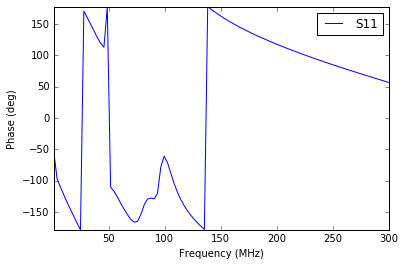

In [28]:
#nv.smith()の返値はskrfのNetworkのインスタンス。いろいろとプロットできる。
_.plot_s_deg()

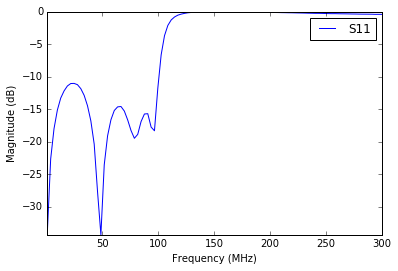

In [54]:
_.plot_s_db()

## touchstoneファイルを読み書き

In [23]:
#skrfのNetworkのインスタンスに変換
n = nv.skrf_network(a)
#ファイルに書き出す
n.write_touchstone('100mhz-lpf-s11')

In [24]:
#ファイルを確認
!cat 100mhz-lpf-s11.s1p

!Created with skrf (http://scikit-rf.org).
# MHz S RI R 50.0 
!freq ReS11 ImS11
1.0 0.012460355 -0.015879744
3.99 -0.008661273 -0.069707974
6.98 -0.042227279 -0.115677334
9.97 -0.092017509 -0.143823102
12.96 -0.147657468 -0.149449899
15.95 -0.201385751 -0.135523363
18.94 -0.243053123 -0.102494128
21.93 -0.270805299 -0.057194426
24.92 -0.279718816 -0.006995845
27.91 -0.26907292 0.044069305
30.9 -0.240883052 0.086606264
33.89 -0.198594421 0.115753814
36.88 -0.148413732 0.127066627
39.87 -0.095692999 0.120097838
42.86 -0.051569625 0.092090547
45.85 -0.021049311 0.050145152
48.84 -0.008668005 0.000488108
51.83 -0.01736783 -0.046825736
54.82 -0.043845944 -0.085811898
57.81 -0.07889305 -0.108475185
60.8 -0.115591615 -0.111082322
63.79 -0.144830152 -0.100106723
66.78 -0.161541178 -0.078393302
69.77 -0.160680696 -0.052953913
72.76 -0.145111352 -0.035594791
75.75 -0.12046393 -0.031371835
78.74 -0.096017956 -0.045363258
81.73 -0.079670108 -0.068865291
84.72 -0.079107657 -0.096139885
87.71 -0.086

In [25]:
#再読み込み
import skrf
skrf.Network('100mhz-lpf-s11.s1p')

1-Port Network: '100mhz-lpf-s11',  1-300 MHz, 101 pts, z0=[ 50.+0.j]

In [26]:
#独自形式で書き出す
n.write('100mhz-lpf')

In [27]:
#独自形式を読み込む
import skrf
skrf.read('100mhz-lpf.ntwk')

1-Port Network: '',  1-300 MHz, 101 pts, z0=[ 50.+0.j]